<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Coleta de Dados II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Web Crawling;</li>
  <li>Web Scraping;</li>
  <li>Web API.</li>
</ol>

---

# **Exercícios**

## 1\. Filmes populares do IMDB

O [IMDB](https://www.imdb.com/) é um famoso site de `reviews` de filmes e seriados. Uma das páginas mais acessadas do website é o ranking de filmes mais bem votados. Neste exercício, vamos extrair informações deste website:

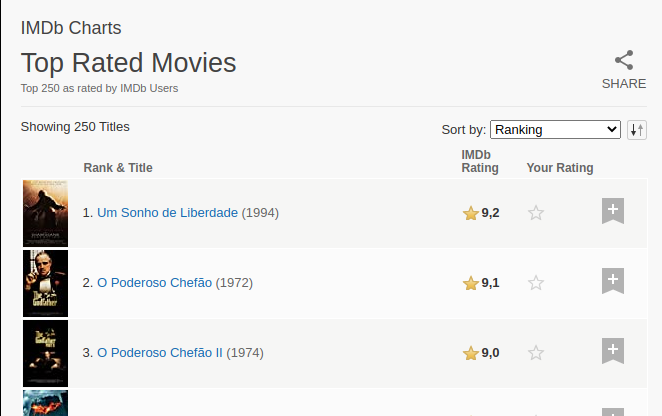

### **1.1. Arquivo Robots.txt** 

Utilize o pacote Python `requests` para fazer o download do conteúdo do arquivo `robots.txt` do site do IMDB e salve numa variável chamada `robots`, este é o link:

```
https://www.imdb.com/robots.txt
```

Com o conteúdo na variável `robots`, verifique se a palavra `top` ou `charts` está presente no conteúdo do texto. Se sim, imprima `True`, senão imprima `False`. 

In [2]:
# solução do exercício 1.1
import requests
import re

URL = 'https://www.imdb.com/robots.txt'

resposta = requests.get(URL)
robots = resposta.text

ocorrencias_top = len(re.findall('top', robots, re.IGNORECASE))
ocorrencias_charts = len(re.findall('charts', robots, re.IGNORECASE))

if ocorrencias_top & ocorrencias_charts == 0:
  print('False')
else:
  print('True')

False


**Dica**: Você pode colar o endereço do arquivo robots.txt no seu navegador para visualizar o conteúdo do arquivo.

### **1.2. Crawling & Scraping** 

Utilize os pacotes Python `requests` e `beautifulsoup4` para extrair os 10 filmes mais populares do IMDB (titulo, ano e nota), este é o link:

```
https://www.imdb.com/chart/top/
```

Escreva os dados extraídos no arquivo csv `imdb.csv` separado por `;` no seguinte formato:

```
ranking;titulo;ano;nota
1;The Shawshank Redemption;1994;9.2
2;The Godfather;1972;9.1
3;The Godfather: Part II;1974;9.0
```

In [3]:
# a) Utilize o pacote requests para fazer o download da página na variável conteudo
import requests
from requests.exceptions import HTTPError

conteudo = None
URL = 'https://www.imdb.com/chart/top/'

try:
  resposta = requests.get(URL)
  resposta.raise_for_status()
except HTTPError as exc:
  print(exc)
else:
  conteudo = resposta.text

In [4]:
# b) Utilize o pacote beautifulsoup4 para carregar o HTML da variavel conteudo na variavel pagina

from bs4 import BeautifulSoup

pagina = BeautifulSoup(conteudo, 'html.parser')

In [9]:
# c) Utilize o código abaixo para iterar nas linhas e colunas da tabela e preencher a variavel conteudo_extraido
dados_extraidos = []

tabela = pagina.find('table', class_='chart')

for linha in tabela.find_all('tr'):
    textos_coluna = list()
    
    for coluna in linha.find_all('td'):
        texto_coluna = coluna.get_text().strip().split('\n')
        textos_coluna += texto_coluna

    if len(textos_coluna) > 0:
        dados_extraidos.append(textos_coluna)
    
dados_extraidos = dados_extraidos[:10]

conteudo_extraido = {
    "Top_10_movies": dados_extraidos,  
}

print(conteudo_extraido)

{'Top_10_movies': [['', '1.', '      The Shawshank Redemption', '(1994)', '9.2', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', ''], ['', '2.', '      The Godfather', '(1972)', '9.2', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', ''], ['', '3.', '      The Dark Knight', '(2008)', '9.0', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', ''], ['', '4.', '      The Godfather Part II', '(1974)', '9.0', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', ''], ['', '5.', '      12 Angry Men', '(1957)', '9.0', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', ''], ['', '6.', "      Schindler's List", '(1993)', '8.9', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', ''], ['', '7.', '      The Lord of the Rings: The Return of the King', '(2003)', '8.9', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', ''], ['', '8.', '      Pulp Fiction', '(1994)', '8.8', '12345678910 ', '', '', '', '

**Dica**: O código na letra c já extrai o conteúdo das linhas na lista `textos_coluna`, basta que você extraia o conteúdo de interesse dela. Como exemplo:

```python
[]
['', '1.', '      The Shawshank Redemption', '(1994)', '9.2', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '2.', '      The Godfather', '(1972)', '9.1', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '3.', '      The Godfather: Part II', '(1974)', '9.0', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '4.', '      The Dark Knight', '(2008)', '9.0', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '5.', '      12 Angry Men', '(1957)', '8.9', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
```

In [11]:
# d) Escreva o arquivo imdb.csv com o conteudo da variavel conteudo_extraido
import pandas as pd

top_10_filmes = pd.DataFrame(conteudo_extraido)
top_10_filmes.to_csv("imdb_top_10.csv", index=False)

---

## 2\. Bônus: Projeto em destaque do GitHub

**Nota**: Este exercício não é obrigatório.

O [GitHub](https://github.com/) é o maior repositória de código aberto na internet. Nele, você pode encontrar o código fonte de diversos projetos, alguns inclusive utilizamos em nossas aulas, como o [Pandas](https://github.com/pandas-dev/pandas). O GitHub apresenta uma página de projetos em destaque, que são os projetos que estão recebendo muita atenção da comunidade: 

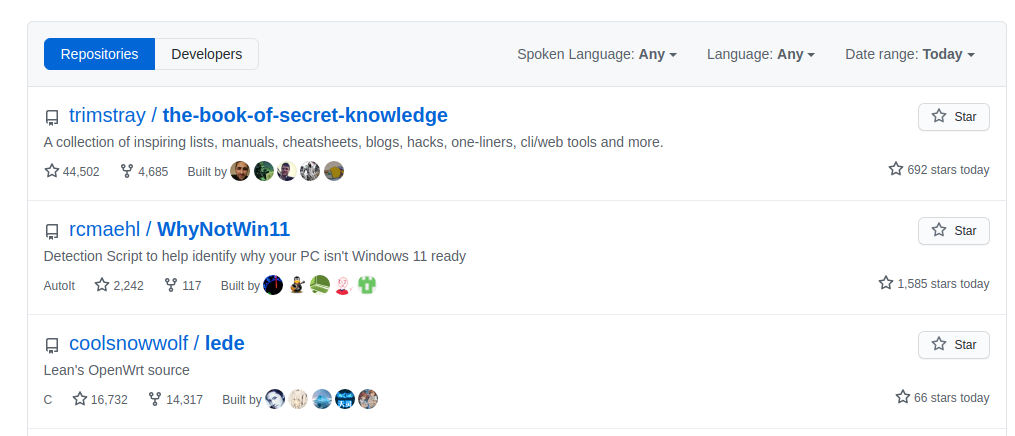

Utilize os pacotes Python `requests` e `beautifulsoup4` para extrair os 10 projetos mais populares do GitHub, este é o link:

```
https://github.com/trending
```

Escreva os dados extraídos no arquivo csv `github.csv` separado por `;` no seguinte formato:

```
ranking;project;language;stars;stars_today;forks
1;the-book-of-secret-knowledge;;44502;692;4685
2;whynotwin11;autoit;2242;1585;117
3;lede;c;16732;66;14317
```

**Nota**: Confira o arquivo `robots.txt` do website.